# 루브릭

## 평가문항
 ### 1. 3가지 데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?	
> * feature와 label 선정을 위한 데이터 분석과정을 전개함
 ### 2. 3가지 데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?	
> * 모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음
 ### 3. 3가지 데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?	
> * 모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음

---

### (0) 사전 준비

#### 필요한 모듈 import하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터
from sklearn.datasets import load_digits # 손글씨
from sklearn.datasets import load_wine   # 와인
from sklearn.datasets import load_breast_cancer # 유방암
from sklearn.model_selection import train_test_split

# 모델
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트
from sklearn import svm #서포트백터머신
from sklearn.linear_model import SGDClassifier # 확률적 경사하강법
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

# 평가
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import confusion_matrix # 오차행렬
from sklearn.metrics import classification_report

#### 공용 함수 정의

In [2]:
# 랜덤 시드값 정의
random_state = 13

# 모델 학습 및 결과값 예측 함수
def fit_and_predict_models(X_train, X_test, y_train):
    # 1. 모델 로딩
    models = []
    models.append(DecisionTreeClassifier(random_state=random_state)) # Decision Tree  
    models.append(RandomForestClassifier(random_state=random_state)) # Random Forest
    models.append(svm.SVC(random_state=random_state)) # SVM (Support Vector Machine)
    models.append(SGDClassifier(random_state=random_state)) # SGD Classifier
    models.append(LogisticRegression(random_state=random_state)) # Logistic Regression
    
    # 2. 모델 학습 및 예측값 구하기
    y_pred_dict = {}
    for model in models:
        model.fit(X_train, y_train)        
        dict_key = str(type(model)).split('.')[-1].replace('>', '').replace('"', '').replace("'", '') # 모델 타입의 가장 마지막 클래스명을 키로 사용
        y_pred = model.predict(X_test)
        y_pred_dict[dict_key] = y_pred
    
    # 3. 예측값 반환
    return y_pred_dict

# 모델 결과값 평가 함수
def evaluate_models_by_classification_report(y_test, y_pred_dict):    
    for model_name, y_pred in y_pred_dict.items():
        print("*"*80)
        print(f'<{model_name} - confusion_matrix>\n')        
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        print('\n')
        print(f'<{model_name} - classification_report>\n')
        print(classification_report(y_test, y_pred))
    print("*"*80)
    
# 모델 정확도 평가 함수
def evaluate_models_by_accuracy(y_test, y_pred_dict):  
    for model_name, y_pred in y_pred_dict.items():
        print(f"{model_name} Accuracy : ", accuracy_score(y_test , y_pred))


## 2-1. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

### (1) 데이터 준비

In [3]:
# load_digits() 로 손글씨 데이터 불러오기
digits = load_digits()

### (2) 데이터 이해하기

In [4]:
# 확인할 수 있는 항목 관찰하기
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# data 확인
print(digits.data.shape)
digits.data[0]

(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
# target 확인
print(digits.target.shape)
digits.target[0]

(1797,)


0

In [7]:
# Feature Data 지정하기
feature_digits = digits.data

In [8]:
# label 지정하기
label_digits = digits.target

In [9]:
# Feature Names 출력하기
digits.feature_names[:5], digits.feature_names[-5:]

(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4'],
 ['pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'])

In [10]:
# Target Names 출력하기
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# 데이터 Describe 해 보기
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [12]:
# 통계량 확인
df_digits = pd.DataFrame(data=feature_digits, columns=digits.feature_names)
df_digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


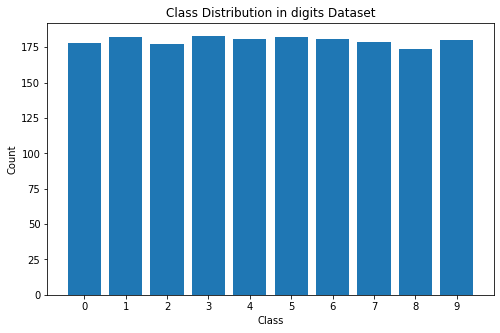

In [13]:
# 클래스 별 개수 확인하기
df_digits['target'] = label_digits
class_counts = df_digits['target'].value_counts().sort_index()

# 클래스 이름과 갯수를 바탕으로 막대 그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index)
plt.title('Class Distribution in digits Dataset')
plt.show()

(참고) 클래스 별 샘플 개수가 비슷함!

### (4) train, test 데이터 분리

In [14]:
X_train, X_test, y_train, y_test = train_test_split(feature_digits, label_digits, test_size=0.2, random_state=random_state)

### (5) 다양한 모델로 학습시켜보기

In [15]:
# 다양한 모델 학습 및 예측값 저장
y_pred_dict = fit_and_predict_models(X_train, X_test, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 위 경고문은 LogisticRegression의 최적화 알고리즘(이 경우 LBFGS)이 지정된 최대 반복 횟수 내에서 수렴하지 못할 때 발생함
> * max_iter 파라미터에 최대 반복 횟수를 인자로 넣어주면 조절 가능  
> * 단, max_iter 값을 증가시킬수록 시간이 오래 걸린다는 점 숙지할 것

In [16]:
# Logistic Regression() 모델 불러오는 부분에 max_iter의 인자값 넣어서 경고문 없애기
def fit_and_predict_models(X_train, X_test, y_train):
    # 1. 모델 로딩
    models = []
    models.append(DecisionTreeClassifier(random_state=random_state)) # Decision Tree  
    models.append(RandomForestClassifier(random_state=random_state)) # Random Forest
    models.append(svm.SVC(random_state=random_state)) # SVM (Support Vector Machine)
    models.append(SGDClassifier(random_state=random_state)) # SGD Classifier
    models.append(LogisticRegression(random_state=random_state, max_iter=5000)) # Logistic Regression, 약 5000 번 정도 반복하면 수렴함
    
    # 2. 모델 학습 및 예측값 구하기
    y_pred_dict = {}
    for model in models:
        model.fit(X_train, y_train)
        dict_key = str(type(model)).split('.')[-1].replace('>', '').replace('"', '').replace("'", '') # 모델 타입의 가장 마지막 클래스명을 키로 사용
        y_pred = model.predict(X_test)
        y_pred_dict[dict_key] = y_pred
    
    # 3. 예측값 반환
    return y_pred_dict

In [17]:
# 다양한 모델 학습 및 예측값 저장(다시 실행)
y_pred_dict = fit_and_predict_models(X_train, X_test, y_train)

### (6) 모델을 평가해 보기

In [18]:
# 모델별 정확도 평가
evaluate_models_by_accuracy(y_test, y_pred_dict)

DecisionTreeClassifier Accuracy :  0.875
RandomForestClassifier Accuracy :  0.9833333333333333
SVC Accuracy :  0.9833333333333333
SGDClassifier Accuracy :  0.9472222222222222
LogisticRegression Accuracy :  0.9527777777777777


평가 지표 : 정확도 (Accuracy)

이유

- 손글씨 숫자는 정확하게 인식하는 것이 목표이므로 정확도를 사용함
- 데이터의 클래스 분포가 다른 데이터들에 비해 균형적임

## 2-2. 프로젝트 (2) load_wine : 와인을 분류해 봅시다

### (1) 데이터 준비

In [19]:
# load_wine() 로 와인 데이터 불러오기
wine = load_wine()

### (2) 데이터 이해하기

In [20]:
# 확인할 수 있는 항목 관찰하기
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [21]:
# data 확인
print(wine.data.shape)
wine.data[0]

(178, 13)


array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [22]:
# target 확인
print(wine.target.shape)
wine.target[0]

(178,)


0

In [23]:
# Feature Data 지정하기
feature_wine = wine.data

In [24]:
# label 지정하기
label_wine = wine.target

In [25]:
# Feature Names 출력하기
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [26]:
# Target Names 출력하기
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [27]:
# 데이터 Describe 해 보기
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [28]:
# 통계량 확인
df_wine = pd.DataFrame(data=feature_wine, columns=wine.feature_names)
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


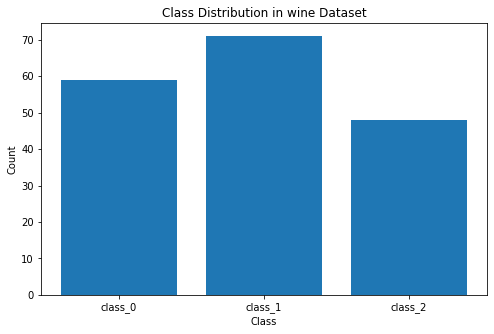

In [29]:
# 클래스 별 개수 확인하기
df_wine['target'] = label_wine
class_counts = df_wine['target'].value_counts().sort_index()

# 클래스 이름과 갯수를 바탕으로 막대 그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index, wine.target_names)
plt.title('Class Distribution in wine Dataset')
plt.show()

(참고) 클래스 별 샘플 개수가 차이가 있음

### (4) train, test 데이터 분리

In [30]:
X_train, X_test, y_train, y_test = train_test_split(feature_wine, label_wine, test_size=0.2, random_state=random_state)

### (5) 다양한 모델로 학습시켜보기

In [31]:
# 다양한 모델 학습 및 예측값 저장
y_pred_dict = fit_and_predict_models(X_train, X_test, y_train)

### (6) 모델을 평가해 보기

In [32]:
# 모델별 정확도 평가
evaluate_models_by_classification_report(y_test, y_pred_dict)

********************************************************************************
<DecisionTreeClassifier - confusion_matrix>

[[12  0  0]
 [ 2 13  0]
 [ 0  2  7]]


<DecisionTreeClassifier - classification_report>

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.87      0.87      0.87        15
           2       1.00      0.78      0.88         9

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36

********************************************************************************
<RandomForestClassifier - confusion_matrix>

[[12  0  0]
 [ 0 15  0]
 [ 0  0  9]]


<RandomForestClassifier - classification_report>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15
           2       1.00   

평가 지표 : 정밀도 (Precision), 재현율 (Recall), F1 점수 (F1-Score)

이유
- 와인 데이터의 경우, 데이터의 클래스 분포가 다른 데이터들에 비해 균형적이지 못함
- 정확도만을 사용하면 모델의 성능을 왜곡할 수 있음

## 2-3. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

### (1) 데이터 준비

In [33]:
# load_breast_cancer() 로 유방암 데이터 불러오기
breast_cancer = load_breast_cancer()

### (2) 데이터 이해하기

In [34]:
# 확인할 수 있는 항목 관찰하기
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
# data 확인
print(breast_cancer.data.shape)
breast_cancer.data[0]

(569, 30)


array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [36]:
# target 확인
print(breast_cancer.target.shape)
breast_cancer.target[0]

(569,)


0

In [37]:
# Feature Data 지정하기
feature_breast_cancer = breast_cancer.data

In [38]:
# label 지정하기
label_breast_cancer = breast_cancer.target

In [39]:
# Feature Names 출력하기
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [40]:
# Target Names 출력하기
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [41]:
# 데이터 Describe 해 보기
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [42]:
# 통계량 확인
df_breast_cancer = pd.DataFrame(data=feature_breast_cancer, columns=breast_cancer.feature_names)
df_breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


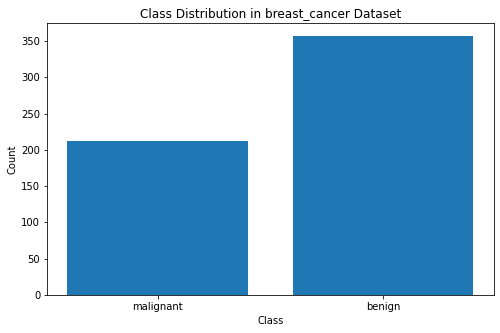

In [43]:
# 클래스 별 개수 확인하기
df_breast_cancer['target'] = label_breast_cancer
class_counts = df_breast_cancer['target'].value_counts().sort_index()

# 클래스 이름과 갯수를 바탕으로 막대 그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index, breast_cancer.target_names)
plt.title('Class Distribution in breast_cancer Dataset')
plt.show()

(참고) 클래스 별 샘플 개수가 차이가 있음

### (4) train, test 데이터 분리

In [44]:
X_train, X_test, y_train, y_test = train_test_split(feature_breast_cancer, label_breast_cancer, test_size=0.2, random_state=random_state)

### (5) 다양한 모델로 학습시켜보기

In [45]:
# 다양한 모델 학습 및 예측값 저장
y_pred_dict = fit_and_predict_models(X_train, X_test, y_train)

### (6) 모델을 평가해 보기

In [46]:
# 모델별 정확도 평가
evaluate_models_by_classification_report(y_test, y_pred_dict)

********************************************************************************
<DecisionTreeClassifier - confusion_matrix>

[[33  3]
 [10 68]]


<DecisionTreeClassifier - classification_report>

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        36
           1       0.96      0.87      0.91        78

    accuracy                           0.89       114
   macro avg       0.86      0.89      0.87       114
weighted avg       0.90      0.89      0.89       114

********************************************************************************
<RandomForestClassifier - confusion_matrix>

[[33  3]
 [ 7 71]]


<RandomForestClassifier - classification_report>

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        36
           1       0.96      0.91      0.93        78

    accuracy                           0.91       114
   macro avg       0.89      0.91      0.90       114
weighte

평가 지표 : 정밀도 (Precision), 재현율 (Recall), F1 점수 (F1-Score)

이유
- 와인 데이터와 마찬가지로, 데이터의 클래스 분포가 다른 데이터들에 비해 균형적이지 못함(양성 데이터가 음성 데이터보다 상대적으로 많다)
- 정확도만을 사용하면 모델의 성능을 왜곡할 수 있음
- 추가적으로, 암 환자인(양성) 사람을 암환자가 아니라고 판단하는 것이 더 위험하기 떄문에 Recall을 주로 보긴함

## 회고

### 성과 및 결과

> sklearn에서 제공하는 3가지의 toy data(손글씨, 와인, 유방암)를 이용해서 5가지 정도의 분류에 특화된 머신러닝 모델을 이용하여 적절한 모델을 만들 수 있었다.

### 배운 점

> 각각의 모델이 어떻게 내부적으로 구현되어있는지  
> 정밀도, 재현율, F1 점수, 정확도 등 평가 요소들이 어떻게 정의되고 어떤 데이터에서 유리한지에 대해 알게 되었다.

### 개선할 점 및 아쉬운 점

> 이번에 사용했던 분류 모델들에는 하이퍼 파라미터가 존재하는데 각각을 세부적으로 다루어보지 못했다. 
> 적절한 성능을 낼 수 있도록 하이퍼 파라미터를 설정해준다면 더 좋은 성능을 보이는 모델을 만들 수 있을것 같다.

### 느낀점

> 페어프로그래밍이 이번이 2번째인데 서로 협력하여 한 개의 코드를 짜보니 다양한 방식으로 코드를 설계할 수 있었다.

### 결론

>  이번 퀘스트를 통해 얻은 지식과 경험은 향후 머신러닝 프로젝트에 도움이 될 것 같다.